Iris Plants Database
====================

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================
    :Missing Attribute Values: None
    :Class Distribution: 33.3% for each of 3 classes.



## Imports
**Import pandas, numpy, matplotlib,and seaborn.Then set %matplotlib inline 
(You'll import sklearn as you need it.)**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Get the Data

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [4]:
print(iris['DESCR'])

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [5]:
df = pd.DataFrame(iris['data'] , columns= iris['feature_names'])

In [6]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
df['target'] = iris['target']

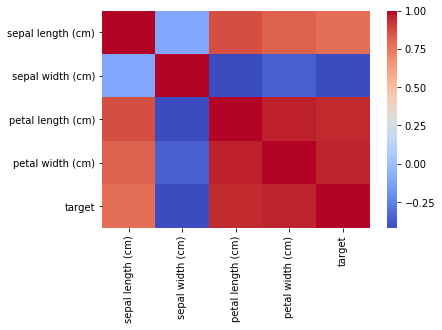

In [8]:
sns.heatmap(df.corr() , cmap='coolwarm')

**sepal width is not correlated to target column**

In [9]:
df.drop('sepal width (cm)', axis = 1, inplace = True)

**Check the head of iris, and check out its info() and describe() methods.**

In [10]:
df.head()

,sepal length (cm),petal length (cm),petal width (cm),target
0,5.1,1.4,0.2,0
1,4.9,1.4,0.2,0
2,4.7,1.3,0.2,0
3,4.6,1.5,0.2,0
4,5.0,1.4,0.2,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
sepal length (cm)    150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
target               150 non-null int32
dtypes: float64(3), int32(1)
memory usage: 4.2 KB


In [12]:
df.describe()

,sepal length (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.758667,1.198667,1.000000
std,0.828066,1.764420,0.763161,0.819232
min,4.300000,1.000000,0.100000,0.000000
25%,5.100000,1.600000,0.300000,0.000000
50%,5.800000,4.350000,1.300000,1.000000
75%,6.400000,5.100000,1.800000,2.000000
max,7.900000,6.900000,2.500000,2.000000


# Exploring Datasets

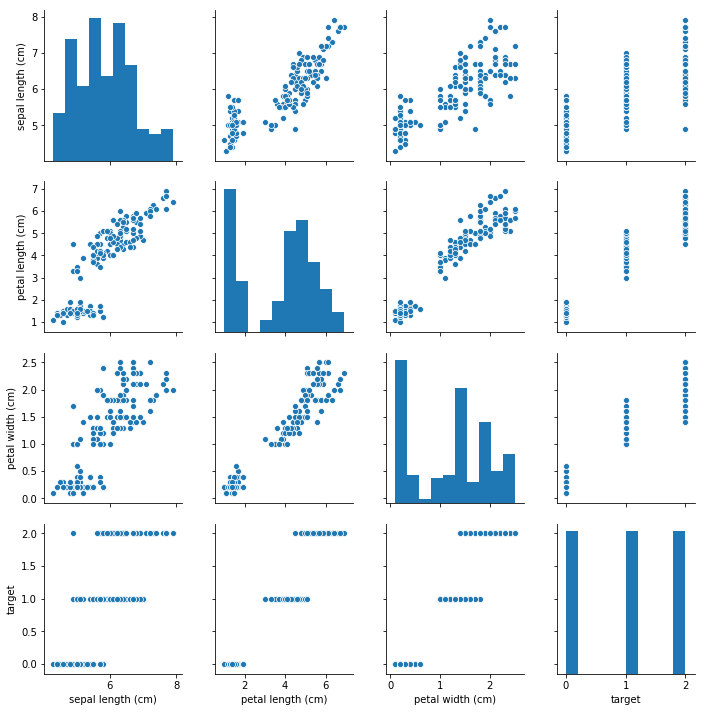

In [13]:
sns.pairplot(df)

# Standard Scaling

In [14]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [15]:
scaled_array = ss.fit_transform(df.drop('target',axis = 1))

In [16]:
data = pd.DataFrame(data=scaled_array , columns=df.columns[:-1])

In [17]:
y = df['target']

In [18]:
data.head()

,sepal length (cm),petal length (cm),petal width (cm)
0,-0.900681,-1.341272,-1.312977
1,-1.143017,-1.341272,-1.312977
2,-1.385353,-1.398138,-1.312977
3,-1.506521,-1.284407,-1.312977
4,-1.021849,-1.341272,-1.312977


# Data Visualization

In [19]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [20]:
x_pca = pca.fit_transform(scaled_array)

In [21]:
x_pca.shape

(150, 2)

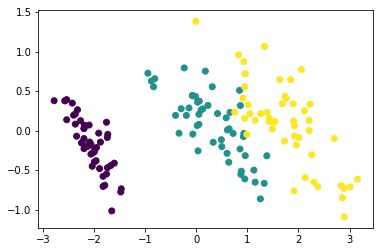

In [22]:
plt.scatter(x_pca[:,0] , x_pca[:,1], c=y)

**Data is linearly seperable**

# Training and Testing Data

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train,X_test,y_train,y_test = train_test_split(data,df['target'],test_size=0.3)

# 1. Linear Regression

In [25]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [26]:
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [27]:
ypred_lr = lr.predict(X_test)

**Checking predictions using confusion metrics**

In [28]:
from sklearn.metrics import confusion_matrix

In [29]:
confusion_matrix(y_test,ypred_lr)

array([[15,  0,  0],
       [ 0, 11,  4],
       [ 0,  1, 14]], dtype=int64)

**Analysing mean error**

In [30]:
from sklearn import metrics

In [31]:
metrics.mean_absolute_error(y_test,ypred_lr)

0.1111111111111111

# 2. Decision Tree

In [32]:
from sklearn.tree import DecisionTreeClassifier
cl = DecisionTreeClassifier()

In [33]:
cl.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [34]:
ypred_cl = cl.predict(X_test)

**Checking predictions using confusion metrics**

In [35]:
from sklearn.metrics import confusion_matrix

In [36]:
confusion_matrix(y_test,ypred_cl)

array([[15,  0,  0],
       [ 0, 14,  1],
       [ 0,  1, 14]], dtype=int64)

**Analysing mean error**

In [37]:
from sklearn import metrics

In [38]:
metrics.mean_absolute_error(y_test,ypred_cl)

0.044444444444444446

# 3.Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)

C:\python\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [40]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [41]:
ypred_rf = rf.predict(X_test)

**Checking predictions using confusion metrics**

In [42]:
confusion_matrix(y_test,ypred_rf)

array([[15,  0,  0],
       [ 0, 14,  1],
       [ 0,  1, 14]], dtype=int64)

**Checking mean error**

In [43]:
metrics.mean_absolute_error(y_test,ypred_rf)

0.044444444444444446

# 4. K-nearest

In [44]:
from sklearn.neighbors import KNeighborsClassifier

In [45]:
error_rate = []
for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    ypred_kn = knn.predict(X_test)
    error_rate.append(np.mean(ypred_kn!=y_test))

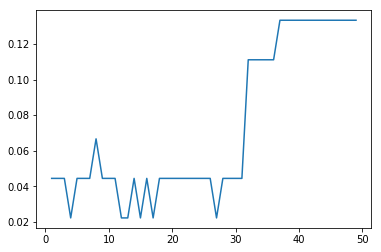

In [46]:
plt.plot(range(1,50) , error_rate)

**Considering k as 5**

In [47]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
ypred_kn = knn.predict(X_test)

**Checking predictions using confusion metrics**

In [48]:
confusion_matrix(y_test,ypred_kn)

array([[15,  0,  0],
       [ 0, 14,  1],
       [ 0,  1, 14]], dtype=int64)

**Checking mean error**

In [49]:
metrics.mean_absolute_error(y_test,ypred_kn)

0.044444444444444446

# 5. Naive Bayes

In [50]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()

In [51]:
classifier.fit(X_train,y_train)

GaussianNB(priors=None)

In [52]:
ypred_nb = classifier.predict(X_test)

**Checking predictions using confusion metrics**

In [53]:
confusion_matrix(y_test,ypred_nb)

array([[15,  0,  0],
       [ 0, 14,  1],
       [ 0,  1, 14]], dtype=int64)

**Checking mean error**

In [54]:
metrics.mean_absolute_error(y_test,ypred_nb)

0.044444444444444446

# 6. SVM

In [55]:
from sklearn.svm import SVC
svm = SVC()

In [56]:
svm.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [57]:
ypred_svm = svm.predict(X_test)

**Checking predictions using confusion metrics**

In [58]:
confusion_matrix(y_test,ypred_svm)

array([[15,  0,  0],
       [ 0, 14,  1],
       [ 0,  1, 14]], dtype=int64)

**Checking mean error**

In [59]:
metrics.mean_absolute_error(y_test,ypred_svm)

0.044444444444444446

# Conclusion:

**mean_absolute_error** predicted by different model:<br>

1. Logistic Regression:0.15
2. Decision Tree: 0.08
3. Random Forest:0.066
3. K-nearest:0.08
4. Naive Bayes: 0.066
5. SVM: 0.06

Best model : SVM , Naive Bayes , Random Forest